# Hiearchical Data
* JSON

**Instructions:** This is an individual assignment, but you may discuss your code with your classmates.

**Problem type key and definition:**
* _Exercises_ are autograded on GitHub classroom
* _Problems_ are manually graded and often open ended without a single correct answer.
* _Stop and think_ prompts are not graded, and are provided to guide you.

Please see the README for instructions on how to submit and obtain the lab.

In [1]:
%load_ext autoreload
%autoreload 2


# Put all your solutions into Lab1_helper.py as this script which is autograded
import Lab5_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

## Data
This data comes from the CORGIS Dataset Project: https://corgis-edu.github.io/corgis/json/cancer/

>Information about the rates of cancer deaths in each state is reported. The data shows the total rate as well as rates based on sex, age, and race. Rates are also shown for three specific kinds of cancer: breast cancer, colorectal cancer, and lung cancer.

In [2]:
import json
import requests

response = requests.get("https://corgis-edu.github.io/corgis/datasets/json/cancer/cancer.json")
data = json.loads(response.text)
print("Each record is a state:")
data[0]

Each record is a state:


{'State': 'Alabama',
 'Total': {'Rate': 214.2, 'Number': 71529.0, 'Population': 33387205.0},
 'Rates': {'Age': {'< 18': 2.0, '18-45': 18.5, '45-64': 244.7, '> 64': 1017.8},
  'Age and Sex': {'< 18': {'Female': 2.0, 'Male': 2.1},
   '18 - 45': {'Female': 20.1, 'Male': 16.8},
   '45 - 64': {'Female': 201.0, 'Male': 291.5},
   '> 64': {'Female': 803.6, 'Male': 1308.6}},
  'Race': {'White': 186.1,
   'White non-Hispanic': 187.5,
   'Black': 216.1,
   'Asian': 81.3,
   'Indigenous': 69.9,
   'Hispanic': 66.5},
  'Race and Sex': {'Female': {'White': 149.2,
    'White non-Hispanic': 150.2,
    'Black': 167.2,
    'Black non-Hispanic': 167.9,
    'Asian': 84.9,
    'Indigenous': 53.8,
    'Hispanic': 58.3},
   'Male': {'White': 237.1,
    'White non-Hispanic': 239.2,
    'Black': 297.9,
    'Black non-Hispanic': 299.2,
    'Asian': 75.7,
    'Indigenous': 88.3,
    'Hispanic': 77.1}}},
 'Types': {'Breast': {'Total': 27.4,
   'Age': {'18 - 44': 5.1, '45 - 64': 39.8, '> 64': 95.7},
   'Race': {'

**Exercise 1:** What is the state with highest rate of cancer deaths? Write a function that sorts the rates in descending order. Make sure you use json_normalize.

In [3]:
df = Lab5_helper.exercise_1(data)
df

,State,Total.Rate
48,West Virginia,254.6
19,Maine,239.1
38,Pennsylvania,227.7
17,Kentucky,226.3
3,Arkansas,223.9
9,Florida,219.2
35,Ohio,217.8
0,Alabama,214.2
42,Tennessee,213.1
45,Vermont,211.6


**Problem 1:** Create a plot (similar to the one below) that plots rate of lung cancer versus rate of breast cancer.

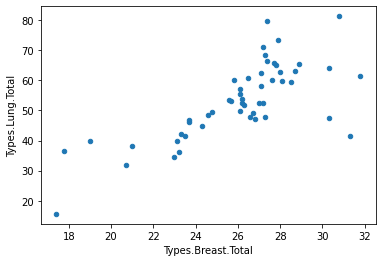

In [4]:
from pandas import json_normalize
# Your solution here

**Problem 2:** Create a plot (similar to the one below) that plots rate of lung cancer versus colorectal cancer.

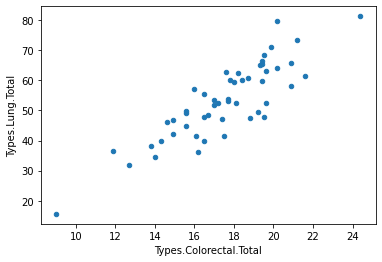

In [5]:
from pandas import json_normalize
# Your solution here

**Exercise 2:** Construct a dataframe that contains the rate of lung, breast, and colorectal cancer with the first column being the state.

In [6]:
df = Lab5_helper.exercise_2(data)
df

,Types.Lung.Total,Types.Breast.Total,Types.Colorectal.Total
State,,,
Alabama,66.4,27.4,19.4
Alaska,36.6,17.8,11.9
Arizona,42.3,23.3,14.9
Arkansas,73.3,27.9,21.2
California,34.5,23.0,14.0
Colorado,31.8,20.7,12.7
Connecticut,49.0,26.7,15.6
Delaware,62.7,28.0,17.6
District of Columbia,41.6,31.3,17.5


**Exercise 3:** Scale the numeric columns of the dataframe from the previous exercise such that they have a mean of 0 and unit variation. You must use from ``sklearn.preprocessing import StandardScaler``.

In [7]:
df_scaled = Lab5_helper.exercise_3(df)
df_scaled

,Types.Lung.Total,Types.Breast.Total,Types.Colorectal.Total
State,,,
Alabama,1.057921,0.453534,0.707495
Alaska,-1.331480,-2.678343,-2.091025
Arizona,-0.874447,-0.884039,-0.971617
Arkansas,1.611171,0.616652,1.379140
California,-1.499861,-0.981910,-1.307439
Colorado,-1.716350,-1.732255,-1.792516
Connecticut,-0.337233,0.225168,-0.710422
Delaware,0.761250,0.649276,0.035850
District of Columbia,-0.930574,1.725859,-0.001463


**Exercise 4:** Compare a hypertuned k-nearest neighbor regressor to a linear regressor using cross_val_score and GridSearchCV. See the helper file for more details. The data has already been scaled.

In [8]:
r2_knn,r2_linear = Lab5_helper.exercise_4(df_scaled)
r2_knn,r2_linear

(0.18740916897872795, 0.1288383146619626)

### What other data that we have considered in this class might be interesting to consider?

... the pesticide data ...

We'll lean on functions from Lab 4. You'll want to copy Lab4_helper.py into this directory to complete these exercises.

In [9]:
# Copied from lab 4
import Lab4_helper

import pandas as pd
import glob
dfs = {}
for file in glob.glob(f'{home}/data-301-student/data/pesticide/*.csv'):
    name = file.split("/")[-1].replace(".csv","")
    dfs[name] = pd.read_csv(file)
    
data = {}
for file in glob.glob(f'{home}/data-301-student/data/pesticide/*.csv.gz'):
    name = file.split("/")[-1].replace(".csv.gz","")
    data[name] = pd.read_csv(file)

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


From lab 4, we know the top pesticides across states:

In [10]:
df_top_pest = Lab4_helper.exercise_2(data['sampledata13'],data['resultsdata13'],dfs['pest_codes'])
df_top_pest

,State,Pesticide Name
0,CA,Heptachlor
3,CO,Dieldrin
4,FL,Dieldrin
8,KY,Diazinon
11,LA,Aldrin
5,MD,Dieldrin
6,MI,Dieldrin
9,MN,Diazinon
12,MO,Aldrin
13,NC,Aldrin


In [11]:
top_names = df_top_pest['Pesticide Name'].value_counts().index
top_names

Index(['Aldrin', 'Dieldrin', 'Diazinon', 'Heptachlor', 'Malathion'], dtype='object')

**Exercise 5:** Let's create a dataset that computes the average concentration of these pesticides for each state. Sort this by state.

HINTS: I used groupby and unstack. I also used other tools we've learned and nothing we haven't other than sort_index() which is a function I don't think I've mentioned. It does what you guess it does :)

In [12]:
df_concentrations = Lab5_helper.exercise_5(top_names,data['sampledata13'],data['resultsdata13'],dfs['pest_codes'])
df_concentrations

Pesticide Name,Aldrin,Dieldrin,Diazinon,Heptachlor,Malathion
state,,,,,
CA,0.0,0.027250,0.000000,0.0,0.022911
CO,0.0,0.000000,0.000000,0.0,0.026260
FL,0.0,0.026467,0.025800,0.0,0.041433
KY,0.0,0.000000,0.000000,0.0,0.000000
LA,0.0,0.000000,0.000000,0.0,0.000000
MD,0.0,0.054750,0.011650,0.0,0.027500
MI,0.0,0.061000,0.009973,0.0,0.054050
MN,0.0,0.000000,0.000000,0.0,0.000000
MO,0.0,0.000000,0.000000,0.0,0.000000


Now... as I'm writing this I have no idea if this will perform any better if we include this information, but there is only way to find out... merging things together.

In [13]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
df_scaled2 = df_scaled.copy()
df_scaled2.index = df_scaled2.index.map(us_state_abbrev)
df_scaled2
df_train = df_scaled2.merge(df_concentrations,left_index=True,right_index=True,how='right')
df_train

,Types.Lung.Total,Types.Breast.Total,Types.Colorectal.Total,Aldrin,Dieldrin,Diazinon,Heptachlor,Malathion
state,,,,,,,,
CA,-1.499861,-0.981910,-1.307439,0.0,0.027250,0.000000,0.0,0.022911
CO,-1.716350,-1.732255,-1.792516,0.0,0.000000,0.000000,0.0,0.026260
FL,0.785304,0.877642,0.782122,0.0,0.026467,0.025800,0.0,0.041433
KY,2.124331,0.453534,1.006004,0.0,0.000000,0.000000,0.0,0.000000
LA,0.536743,0.681900,0.707495,0.0,0.000000,0.000000,0.0,0.000000
MD,-0.425432,0.420910,-0.374599,0.0,0.054750,0.011650,0.0,0.027500
MI,0.496652,0.812395,0.185105,0.0,0.061000,0.009973,0.0,0.054050
MN,-0.673994,-0.557802,-0.710422,0.0,0.000000,0.000000,0.0,0.000000
MO,0.985757,0.942889,0.707495,0.0,0.000000,0.000000,0.0,0.000000


I have to admit I'm excited, but also waiting to be disappointed as is often the case in the real world... will this new information improve performance? More columns does not always mean better (often the reverse). We also need to scale the data again for knn. Rework your previous exercise and find out!

**Exercise 6:** Using df_train, compare a hypertuned k-nearest neighbor regressor to a linear regressor using cross_val_score and GridSearchCV. See the helper file for more details. 

In [14]:
df_train_scaled = Lab5_helper.exercise_3(df_train)
r2_knn,r2_linear = Lab5_helper.exercise_6(df_train_scaled)
r2_knn,r2_linear

(-0.27034007398397863, -1.1301037967944094)

Oh well... This doesn't mean this information wouldn't be useful for other regressors, but for the two we are most familiar with this did not help. Too many data scientists throw out negative results in the hunt for positive results. This may be ok depending on the industry, but for many applications where inference is key, you must never completely throw away negative results. We need to change the culture around data science such that a well run experiment that produces a result we don't want is valued. Does this mean pesticides can't cause cancer, of course not. This is a very limited dataset. We can only speak and discuss the bias and limits of our analysis. 

I hope you have had a great time in this course!

In [15]:
# Good job!
# Don't forget to push with ./submit.sh